In [41]:
%cd ..

/home/soda/rcappuzz/work


In [42]:
%load_ext autoreload
%autoreload 2
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import matplotlib.colors as mcolors
import src.utils.plotting as plotting
from src.utils.logging import read_logs
import tarfile
import json
import pandas as pd 
cfg = pl.Config()
cfg.set_fmt_str_lengths(150)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


polars.config.Config

In [43]:
run_path = "/home/soda/rcappuzz/work/benchmark-join-suggestions/results/logs/0290-cxj8u83z"

In [44]:
df_raw = read_logs(exp_name=None, exp_path=run_path)
df_raw = df_raw.with_columns(pl.col("epsilon").cast(pl.Utf8))

In [5]:
# df_raw = df_raw.with_columns(
#     pl.when(pl.col("right_on").is_null())
#     .then(pl.col("estimator"))
#     .otherwise(pl.col("estimator") + " " + pl.col("right_on").cast(pl.Utf8))
#     .alias("epsilon")
# )

In [6]:
df_raw

scenario_id,status,target_dl,jd_method,base_table,query_column,estimator,aggregation,chosen_model,fold_id,time_fit,time_predict,time_run,r2score,rmse,f1score,auc,n_cols,budget_type,budget_amount,epsilon
i64,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,str,str,i64,str,i64,str
0,"""SUCCESS""","""binary_update""","""minhash""","""movies-yadl""","""col_to_embed""","""nojoin""","""first""","""linear""",null,0.508112,0.061433,0.571313,0.416721,0.982466,null,null,18,null,null,null
0,"""SUCCESS""","""binary_update""","""minhash""","""movies-yadl""","""col_to_embed""","""stepwise_greedy_join""","""first""","""linear""",null,11.41281,0.613367,12.026982,0.408508,0.989359,null,null,23,"""iterations""",20,"""0.0"""
0,"""SUCCESS""","""binary_update""","""minhash""","""movies-yadl""","""col_to_embed""","""highest_containment""","""first""","""linear""",null,3.216104,0.159985,3.376845,0.410297,0.987862,null,null,19,null,null,null
0,"""SUCCESS""","""binary_update""","""minhash""","""movies-yadl""","""col_to_embed""","""best_single_join""","""first""","""linear""",null,5.480328,0.088583,5.56964,0.397888,0.998201,null,null,19,null,null,null
0,"""SUCCESS""","""binary_update""","""minhash""","""movies-yadl""","""col_to_embed""","""full_join""","""first""","""linear""",null,1.714303,1.522423,3.237779,0.413097,0.985514,null,null,26,null,null,null
0,"""SUCCESS""","""binary_update""","""minhash""","""movies-yadl""","""col_to_embed""","""nojoin""","""first""","""linear""",null,0.161205,0.057358,0.220105,0.44778,0.895232,null,null,18,null,null,null
0,"""SUCCESS""","""binary_update""","""minhash""","""movies-yadl""","""col_to_embed""","""stepwise_greedy_join""","""first""","""linear""",null,5.974594,0.545689,6.521135,0.403561,0.930384,null,null,24,"""iterations""",20,"""0.0"""
0,"""SUCCESS""","""binary_update""","""minhash""","""movies-yadl""","""col_to_embed""","""highest_containment""","""first""","""linear""",null,3.279757,0.196793,3.477699,0.441545,0.900271,null,null,19,null,null,null
0,"""SUCCESS""","""binary_update""","""minhash""","""movies-yadl""","""col_to_embed""","""best_single_join""","""first""","""linear""",null,5.697061,0.084286,5.78286,0.411488,0.924181,null,null,19,null,null,null


In [7]:
df_ = df_raw.select(
    pl.col(
        [
            "scenario_id",
            "jd_method",
            "base_table",
            "estimator",
            "chosen_model",
            "aggregation",
            "r2score",
            "time_fit",
            "time_predict",
            "time_run",
            "epsilon",
        ]
    )
)

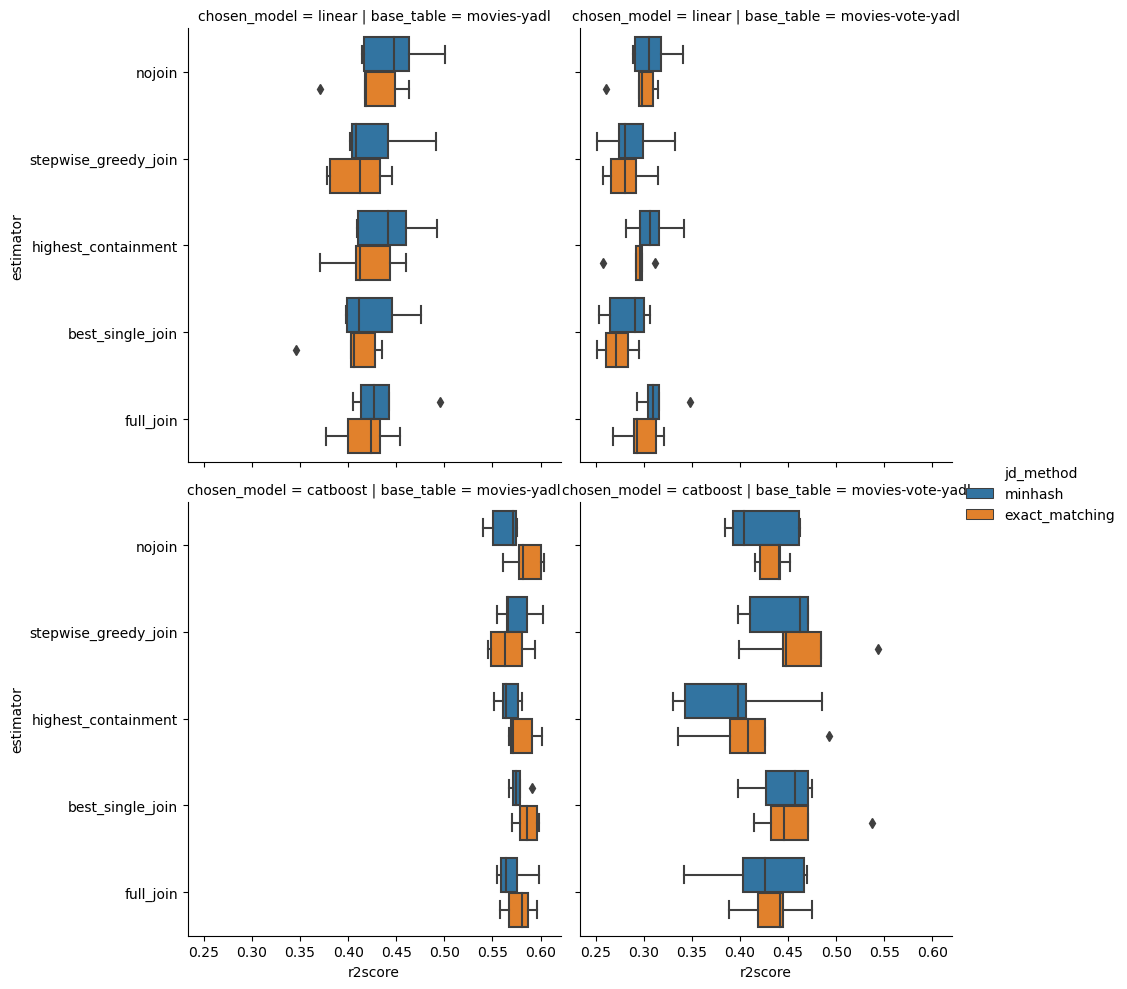

In [8]:
ax = sns.catplot(
    data=df_.to_pandas(),
    # data=df_.filter(pl.col("chosen_model") == "catboost").to_pandas(),
    x="r2score",
    y="estimator",
    hue="jd_method",
    kind="box",
    col="base_table",
    row="chosen_model",
    sharex=True,
    # col_wrap=col_wrap,
    # col_order=col_order,
    # facet_kws={"xlim": [0,1]}
)

# BIG BATCH

In [45]:
run_path= "/home/soda/rcappuzz/work/benchmark-join-suggestions/results/logs/0309-imi1u8db"

In [46]:
df_raw = read_logs(exp_name=None, exp_path=run_path)
df_raw = df_raw.with_columns(pl.col("epsilon").cast(pl.Utf8))

In [47]:
df_ = df_raw.select(
    pl.col(
        [
            "scenario_id",
            "target_dl",
            "jd_method",
            "base_table",
            "estimator",
            "chosen_model",
            "aggregation",
            "r2score",
            "time_fit",
            "time_predict",
            "time_run",
            "epsilon",
        ]
    )
)

In [48]:
col_order = df_.select(pl.col("base_table")).unique().sort("base_table").to_series().to_list()

In [49]:
df_=df_.with_columns((pl.col("jd_method") + " | " + pl.col("target_dl")).alias("case"))

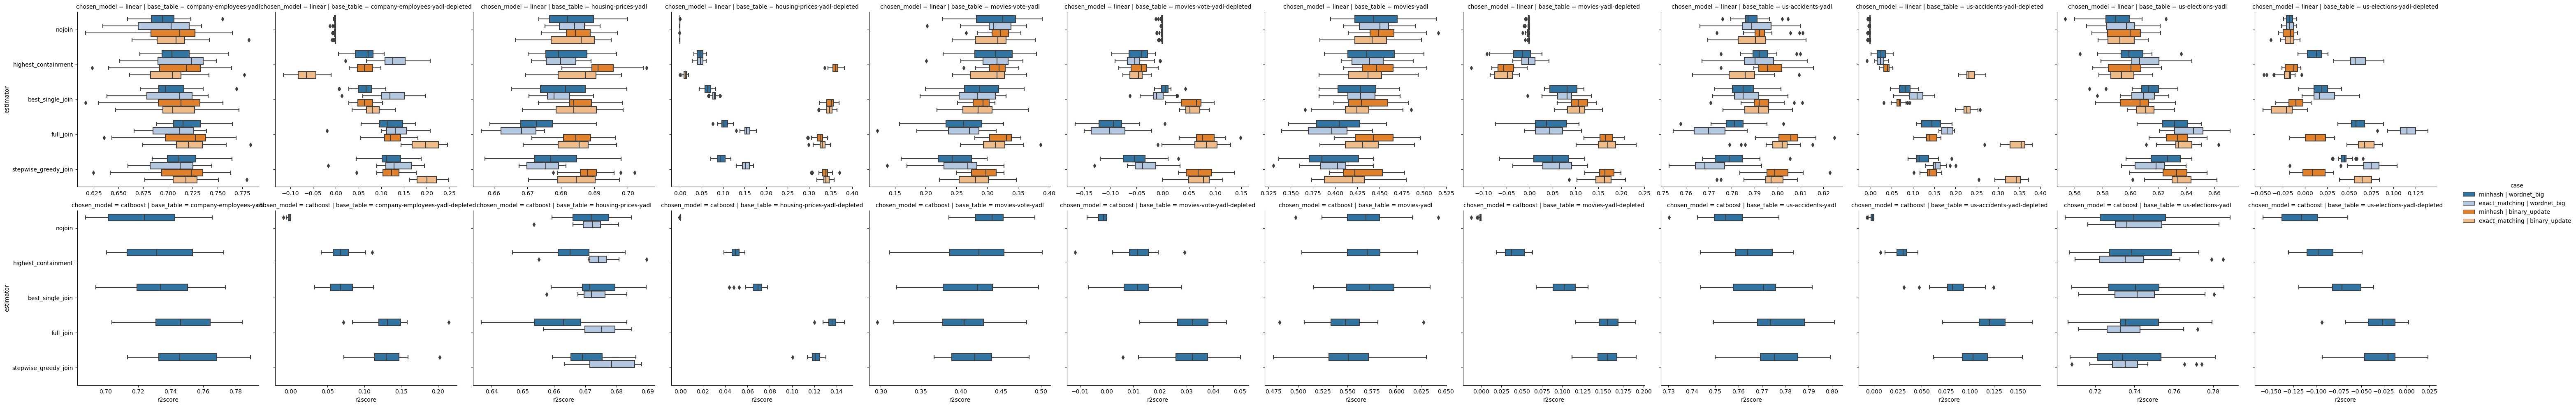

In [54]:
ax = sns.catplot(
    data=df_.to_pandas(),
    # data=df_.filter(pl.col("chosen_model") == "catboost").to_pandas(),
    x="r2score",
    y="estimator",
    hue="case",
    kind="box",
    col="base_table",
    row="chosen_model",
    sharex=0,
    # col_wrap=2,
    col_order=col_order,
    order=y_order,
    # facet_kws={"xlim": [0,1]}
    palette="tab20"
)

In [53]:
y_order = ["nojoin", "highest_containment", "best_single_join", "full_join", "stepwise_greedy_join"]

In [ ]:
|